# OCR Practice Exercise

In this exercise, you will work on Optical Character Recognition (OCR) using the Keras OCR library.
Your task is to detect and recognize text from images. This notebook will guide you through the process of setting up the environment, loading and preprocessing images, applying the OCR model, and displaying the results.

## Objectives
- Set up the environment and install necessary libraries.
- Load and preprocess images for OCR.
- Apply the Keras OCR model to detect and recognize text.
- Display and analyze the OCR results.

This exercise is designed to help you understand the OCR pipeline, from image preprocessing to text recognition, and prepare you for the practical exam.
The example image can be found under `Datasets/OCR_Example`.

## Install Libraries

In [ ]:
!pip install tensorflow==2.9.1 keras==2.9.0

In [ ]:
!pip install keras-ocr

## Import necessary libraries
In this step, you can import these libraries to help you:
- `keras_ocr`
- `matplotlib.pyplot`
- `keras_ocr.pipeline.Pipeline`
- `opencv`
- `numpy`

You can use any other libraries

In [ ]:
import keras_ocr
import matplotlib.pyplot as plt
from keras_ocr.pipeline import Pipeline
import cv2
import numpy as np

## Download and visualize sample image
Here we will be downloading the image for OCR.

(-0.5, 639.5, 479.5, -0.5)

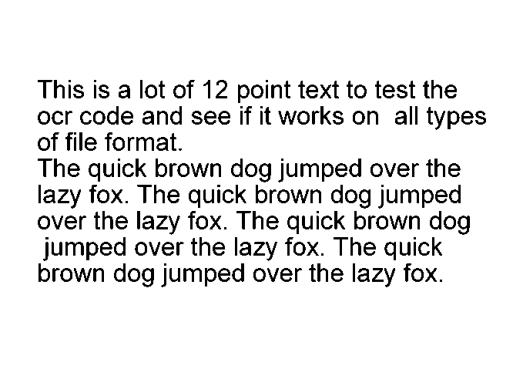

In [ ]:
image_path = '/content/OCR_example.png'
image = cv2.imread(image_path)

plt.imshow(image)
plt.axis('off')

## Preprocess the image
This step involves converting the images into a format suitable for OCR, using OpenCV and standard preprocessing techniques such as resizing and color conversion.

### Convert to grayscale

(-0.5, 639.5, 479.5, -0.5)

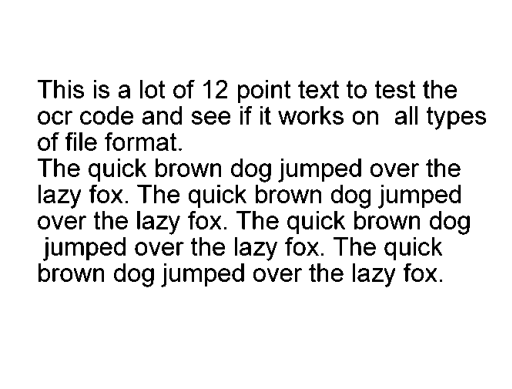

In [ ]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(image, cmap = 'gray')
plt.axis('off')

### Remove noise

(-0.5, 639.5, 479.5, -0.5)

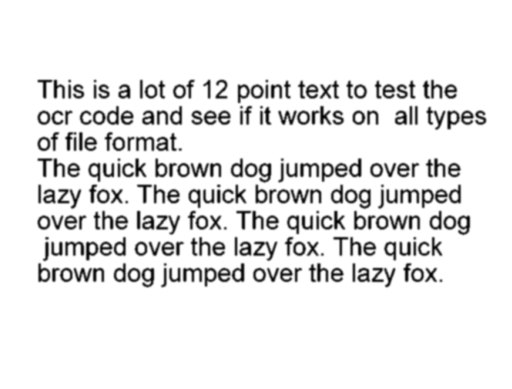

In [ ]:
denoised_image = cv2.GaussianBlur(image, (5, 5), 0)

plt.imshow(denoised_image, cmap = 'gray')
plt.axis('off')

### Sharpen the image

(-0.5, 639.5, 479.5, -0.5)

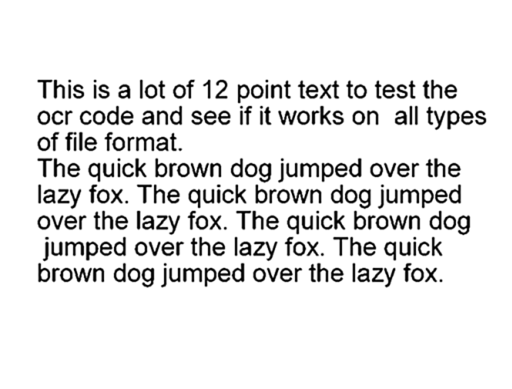

In [ ]:
kernel = np.array([[0, -1, 0],
                   [-1, 5, -1],
                   [0, -1, 0]])

sharpened_image = cv2.filter2D(denoised_image, -1, kernel)

plt.imshow(sharpened_image, cmap = 'gray')
plt.axis('off')

### Binarize the image

(-0.5, 639.5, 479.5, -0.5)

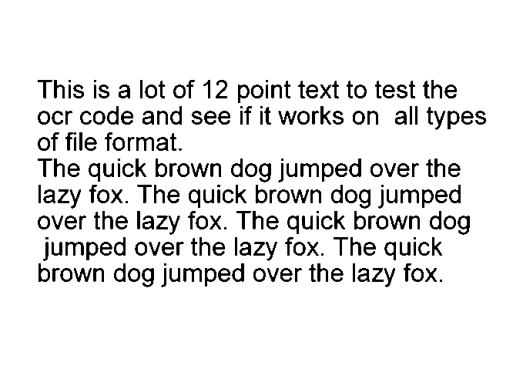

In [ ]:
_, binarized_image = cv2.threshold(sharpened_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.imshow(binarized_image, cmap = 'gray')
plt.axis('off')

## Display preprocessed images
Display the preprocessed images .

(-0.5, 639.5, 479.5, -0.5)

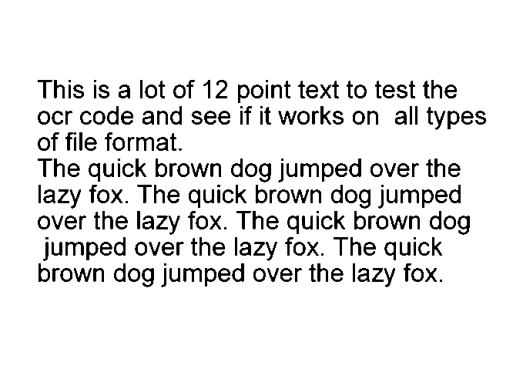

In [ ]:
image = binarized_image

plt.imshow(image, cmap='gray')
plt.axis('off')

In [ ]:
image.shape

(480, 640)

In [ ]:
image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)

In [ ]:
image.shape

(480, 640, 3)

## Get the OCR model using keras_ocr
Create a keras_ocr pipeline, to handle text detection and recognition using pre-trained model.

In [ ]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


## Perform OCR on the image
Runs the OCR pipeline on the preprocessed image and extracts text.

In [ ]:
prediction = pipeline.recognize([image])
prediction

2/2 [==============================] - 26s 8s/step


[[('12',
   array([[248.,  89.],
          [285.,  89.],
          [285., 119.],
          [248., 119.]], dtype=float32)),
  ('this',
   array([[ 35.,  90.],
          [ 98.,  90.],
          [ 98., 118.],
          [ 35., 118.]], dtype=float32)),
  ('of',
   array([[210.,  91.],
          [242.,  91.],
          [242., 118.],
          [210., 118.]], dtype=float32)),
  ('the',
   array([[534.,  91.],
          [583.,  91.],
          [583., 118.],
          [534., 118.]], dtype=float32)),
  ('is',
   array([[106.,  92.],
          [131.,  92.],
          [131., 118.],
          [106., 118.]], dtype=float32)),
  ('lot',
   array([[166.,  92.],
          [204.,  92.],
          [204., 118.],
          [166., 118.]], dtype=float32)),
  ('point',
   array([[291.49567,  93.43365],
          [366.62842,  88.4248 ],
          [368.6682 , 119.02213],
          [293.53546, 124.03098]], dtype=float32)),
  ('text',
   array([[372.,  92.],
          [431.,  92.],
          [431., 118.],
         

## Display the OCR predictions
The predictions made by the keras_ocr pipeline are stored in a variable. You should inspect the recognized text and do the following:
* You should print the detected texts in the image.
* You can also use `keras_ocr.tools.drawAnnotations()` to visualize the extracted text.

In [ ]:
text = ''
for text_result in prediction[0]:
    text += text_result[0]
    text += ' '

print(text)

12 this of the is lot point text to test a code and if it works all types see ocr on of file format the quick brown dog jumped the over the quick brown dog jumped fox lazy the the quick dog lazy fox brown over quick jumped the the fox lazy over dog jumped the fox brown lazy over 


<Axes: >

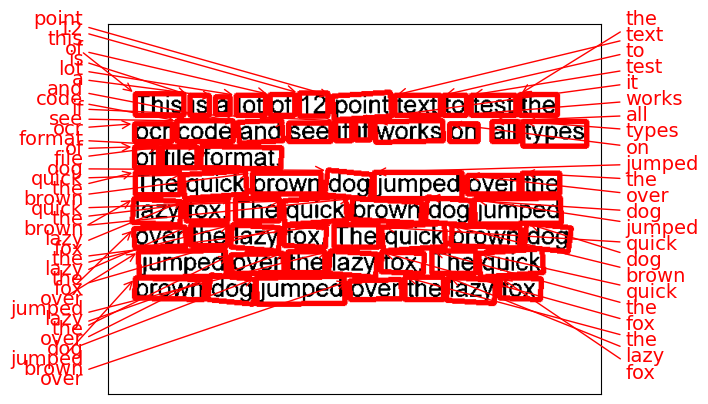

In [ ]:
keras_ocr.tools.drawAnnotations(image=image, predictions=prediction[0])